#### Regime change



In [114]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2000-01-01'
end_date = '2023-09-01'

apple = yf.download('AAPL', start = start_date, end = end_date)
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800
...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


In [2]:
import AdvancedTimeSeries as ats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(apple).dropna()
        df2 = ats.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['Close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Us

d: 0.1, error: Invalid input, x is constant
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-0.605570,8.697184e-01,1.0,3436.0,-2.862382,1.000000
0.4,-1.012758,7.485826e-01,1.0,4.0,-4.474365,0.943943
0.5,-0.752508,8.326761e-01,1.0,12.0,-3.154972,0.905201
0.6,-2.028495,2.742204e-01,1.0,31.0,-2.960525,0.574228
0.7,-4.137261,8.399285e-04,1.0,83.0,-2.897048,0.219324
0.8,-9.869808,4.022871e-17,1.0,246.0,-2.873362,0.226661
0.9,-19.389644,0.000000e+00,1.0,844.0,-2.864971,-0.030579
1.0,-42.322209,0.000000e+00,1.0,3435.0,-2.862382,0.009770
1.1,-36.936034,0.000000e+00,1.0,2098.0,-2.862919,0.014032
1.2,-40.915100,0.000000e+00,1.0,2210.0,-2.862849,0.008917


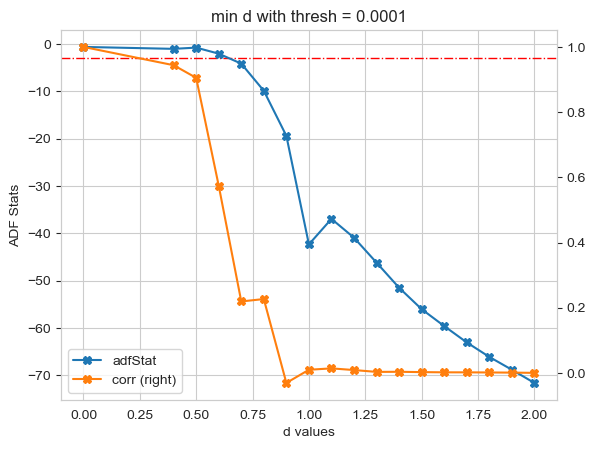

In [4]:
f,ax = plt.subplots()
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('ADF Stats')
display(out)

Text(0.5, 1.0, 'Expanding Window Fractional Differentiated Series')

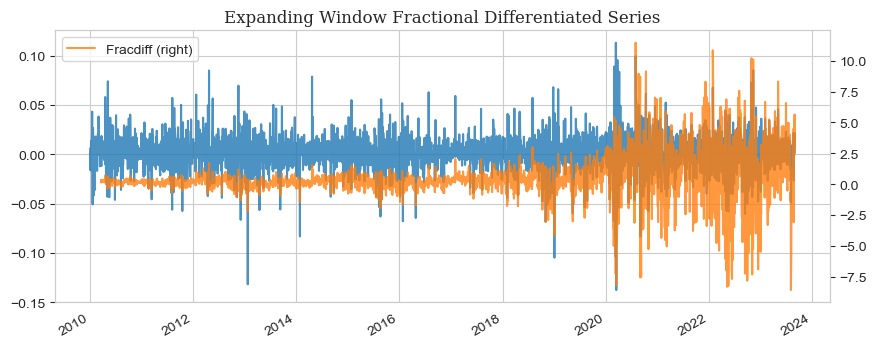

In [5]:
plt.figure(figsize = (10,4))
plt.plot(np.log(apple.Close / apple.Close.shift(1)).dropna(), alpha = 0.8)
ats.fracDiff(apple, 0.7).Close.plot(secondary_y = True, alpha = 0.8, label = 'Fracdiff')
plt.legend()
plt.title('Expanding Window Fractional Differentiated Series', fontfamily = 'Serif', fontsize = 12)

<Axes: xlabel='Close', ylabel='Count'>

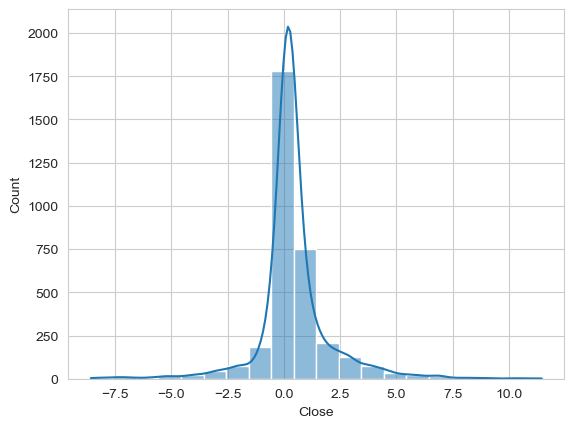

In [6]:
import seaborn as sns
sns.histplot(ats.fracDiff(apple, 0.7).Close, kde = True, bins = 20)

In [7]:
sadf = ats.get_bSADF_test_statistics(np.log(apple.Close), minSL = 100, constant = 'ct', lags = 1)

Text(0.5, 1.0, 'Supremum ADF test (Apple)')

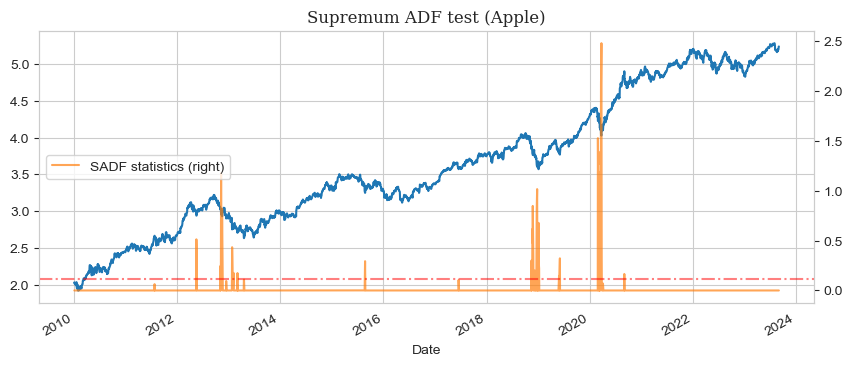

In [8]:
plt.figure(figsize = (10, 4))
plt.plot(np.log(apple.Close))
sadf.plot(secondary_y = True, alpha = 0.7, label = 'SADF statistics')
plt.legend(loc = 'uppter left')
plt.axhline(np.log(apple.Close).mean() * (1.65 * np.log(apple.Close).std() / np.sqrt(2158)), color = 'r', ls = '-.', alpha = 0.5)
plt.title('Supremum ADF test (Apple)', fontfamily = 'Serif', fontsize = 12)

In [9]:
ret = ats.fracDiff(apple, 0.7).Close
ret_quantile = pd.qcut(ret, q = 10, labels = range(10))
message = ''.join(map(str, ret_quantile.values))

In [10]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.11682116764949532
Konto's Entropy estimation: 2.20770623749348


In [11]:
segments = ats.generate_buckets(series = ret, sigma = ret.std())
ret_sigma = ret.apply(lambda obs: ats.encode_single_obs(obs = obs, segments = segments))
message = ''.join(map(str, ret_sigma.values))

Text(0.5, 1.0, 'Sigma Encoding (Apple)')

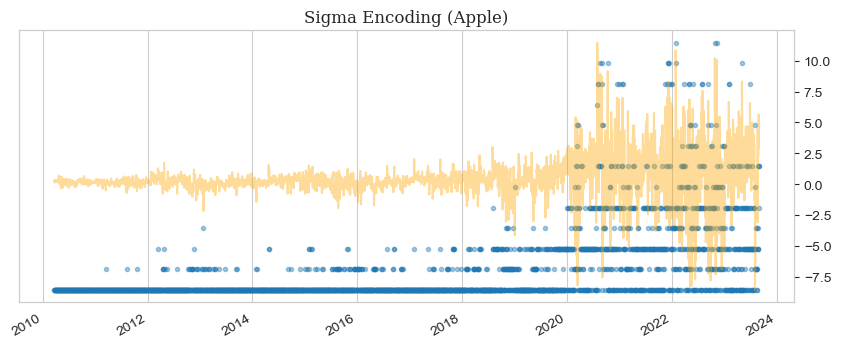

In [12]:
plt.figure(figsize = (10,4))
plt.scatter(ret_sigma.index, ret_sigma, marker = '.', alpha = 0.4)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Sigma Encoding (Apple)', fontfamily = 'Serif', fontsize = 12)

In [13]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.11285401300527967
Konto's Entropy estimation: 1.0528255810308547


In [14]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

In [15]:
bin = ats.OptimizeBins(len(ret), corr = None)
print('Optimized Bin : ', bin)

Optimized Bin :  22


In [16]:
etp = []
for i in range(100, len(ret)) :
    hX = ss.entropy(np.histogram(ret[i-100:i], bin)[0])
    etp.append(hX)
etp = pd.DataFrame(etp, index = ret.index[100:])
etp.columns = ['Market Entropy']
etp

,Market Entropy
2010-08-12,2.722439
2010-08-13,2.720324
2010-08-16,2.731340
2010-08-17,2.736462
2010-08-18,2.733436
...,...
2023-08-25,2.384487
2023-08-28,2.377261
2023-08-29,2.379857
2023-08-30,2.386232


Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

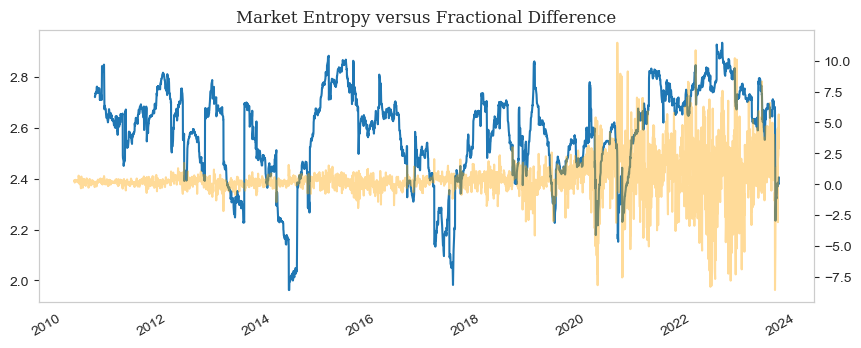

In [17]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

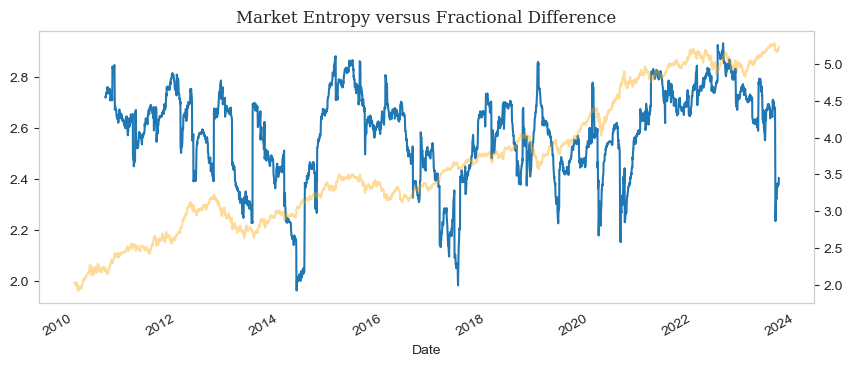

In [18]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

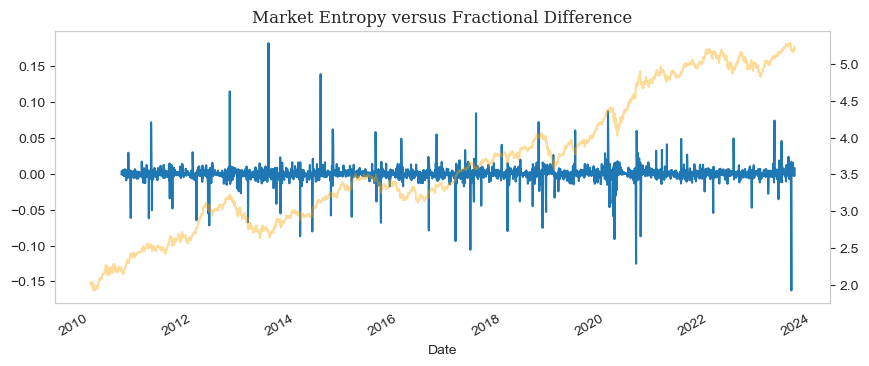

In [19]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp.pct_change())
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

In [20]:
def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

In [21]:
becker_parkinson = getSigma(getBeta(apple, 1), getGamma(apple))
becker_parkinson

Date
2010-01-05    0.006909
2010-01-06    0.009001
2010-01-07    0.017038
2010-01-08    0.000036
2010-01-11    0.005158
                ...   
2023-08-25    0.008254
2023-08-28    0.017033
2023-08-29    0.018913
2023-08-30    0.032397
2023-08-31    0.015307
Length: 3438, dtype: float64

In [22]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import statsmodels.api as sm
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2
        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization="approximate_diffuse",
            loglikelihood_burn=k_states
        )
        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                           [0, 1]])
        self.ssm['selection'] = np.eye(k_states)
        # Cache some indices
        self._state_cov_idx = ("state_cov",) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ["sigma2.measurement", "sigma2.level", "sigma2.trend"]

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained ** 2

    def untransform_params(self, constrained):
        return constrained ** 0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)
        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [23]:
model = LocalLinearTrend(becker_parkinson)
result = model.fit(disp = True)

print(result.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.05096D-01    |proj g|=  3.71278D+00

At iterate    1    f= -1.59574D+00    |proj g|=  1.25456D+01

At iterate    2    f= -1.60979D+00    |proj g|=  1.16910D+01

At iterate    3    f= -2.29613D+00    |proj g|=  1.58462D+01

At iterate    4    f= -2.30568D+00    |proj g|=  1.72819D+01

At iterate    5    f= -2.46431D+00    |proj g|=  1.97259D+01

At iterate    6    f= -2.46968D+00    |proj g|=  1.83414D+01

At iterate    7    f= -2.51652D+00    |proj g|=  2.18557D+01

At iterate    8    f= -2.52242D+00    |proj g|=  2.69266D+01

At iterate    9    f= -2.59266D+00    |proj g|=  3.31282D+01

At iterate   10    f= -2.61504D+00    |proj g|=  4.22423D+01

At iterate   11    f= -2.66499D+00    |proj g|=  6.15932D+01

At iterate   12    f= -2.68848D+00    |proj g|=  6.06950D+01

At iterate   13    f= -2.7


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


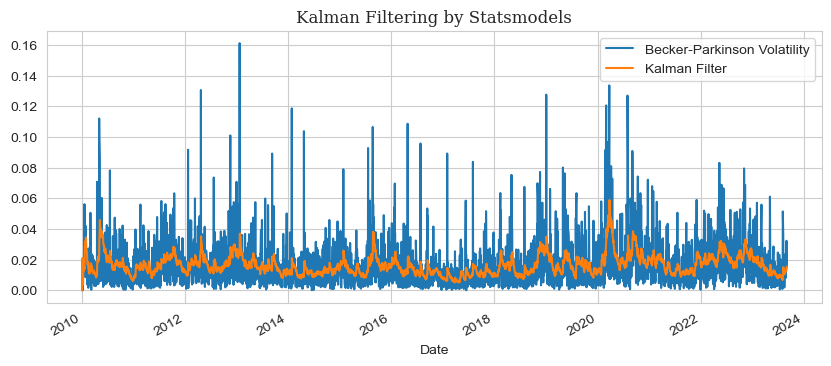

In [24]:
predict = result.get_prediction()
plotting = pd.DataFrame({"Becker-Parkinson Volatility": becker_parkinson,
                      "Kalman Filter": predict.predicted_mean})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtering by Statsmodels", fontfamily = 'Serif', fontsize = 12)
plt.show()

In [163]:
ret = np.log(apple.Close / apple.Close.shift(1)).dropna()

In [164]:
volatility = predict.predicted_mean

In [165]:
ma5 = apple.Close.rolling(window = 5, center = False).mean()
ma60 = apple.Close.rolling(window = 60, center = False).mean()

In [166]:
fracdiff = ats.fracDiff_FFD(apple, 0.7).Close

In [101]:
#rsi = momentum.rsi(apple.Close)

In [167]:
matrix = pd.concat([ret, fracdiff, sadf, etp, volatility, ma5, ma60], axis = 1).dropna()
matrix.columns = ['Log return','Fracdiff','SADF','Entropy','Volatility','MA5','MA60']
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60
2011-06-23,0.026369,0.337903,0.0,2.673806,0.018355,11.533714,12.085333
2011-06-24,-0.014843,-0.047472,0.0,2.684040,0.017894,11.577214,12.072071
2011-06-27,0.017285,0.248029,0.0,2.678919,0.017920,11.696643,12.062268
2011-06-28,0.009651,0.227211,0.0,2.688319,0.016787,11.767786,12.056732
2011-06-29,-0.003646,0.083531,0.0,2.692119,0.017034,11.849429,12.052476
...,...,...,...,...,...,...,...
2023-08-25,0.012564,2.424872,0.0,2.384487,0.013103,177.835999,185.721334
2023-08-28,0.008807,2.760537,0.0,2.377261,0.012609,178.706000,185.723001
2023-08-29,0.021576,5.469984,0.0,2.379857,0.013039,180.084000,185.775834
2023-08-30,0.018991,6.048004,0.0,2.386232,0.013614,181.389999,185.910334


In [168]:
matrix['Labels'] = 0
matrix.loc[matrix['MA5'] > matrix['MA60'], 'Labels'] = 1

In [169]:
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60,Labels
2011-06-23,0.026369,0.337903,0.0,2.673806,0.018355,11.533714,12.085333,0
2011-06-24,-0.014843,-0.047472,0.0,2.684040,0.017894,11.577214,12.072071,0
2011-06-27,0.017285,0.248029,0.0,2.678919,0.017920,11.696643,12.062268,0
2011-06-28,0.009651,0.227211,0.0,2.688319,0.016787,11.767786,12.056732,0
2011-06-29,-0.003646,0.083531,0.0,2.692119,0.017034,11.849429,12.052476,0
...,...,...,...,...,...,...,...,...
2023-08-25,0.012564,2.424872,0.0,2.384487,0.013103,177.835999,185.721334,0
2023-08-28,0.008807,2.760537,0.0,2.377261,0.012609,178.706000,185.723001,0
2023-08-29,0.021576,5.469984,0.0,2.379857,0.013039,180.084000,185.775834,0
2023-08-30,0.018991,6.048004,0.0,2.386232,0.013614,181.389999,185.910334,0


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [171]:
X = matrix.iloc[:,:-3]
y = matrix['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

rf = RandomForestClassifier(n_estimators = 1000, 
                            criterion = "entropy", 
                            bootstrap = True, n_jobs=1, 
                            random_state = 42, 
                            class_weight = 'balanced_subsample', 
                            oob_score = False)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000, n_jobs=1, random_state=42)

              precision    recall  f1-score   support

    no trade       0.69      0.59      0.64       246
       trade       0.75      0.82      0.78       368

    accuracy                           0.73       614
   macro avg       0.72      0.71      0.71       614
weighted avg       0.73      0.73      0.73       614


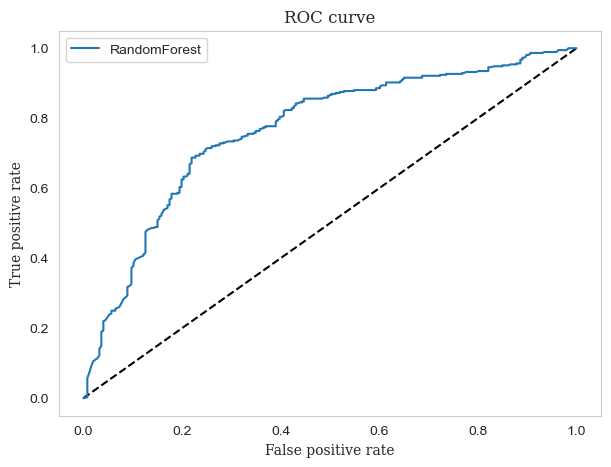

In [172]:
fit = rf.fit(X_train, y_train)
y_pred_rf = fit.predict_proba(X_test)[:, 1]
y_pred = fit.predict(X_test)
fpr_bc, tpr_bc, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred, target_names = ['no trade',' trade']))

plt.figure(figsize = (7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_bc, tpr_bc, label = 'RandomForest')
plt.grid(False)
plt.xlabel('False positive rate', fontfamily = 'Serif')
plt.ylabel('True positive rate', fontfamily = 'Serif')
plt.title('ROC curve', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = 'best')
plt.show()

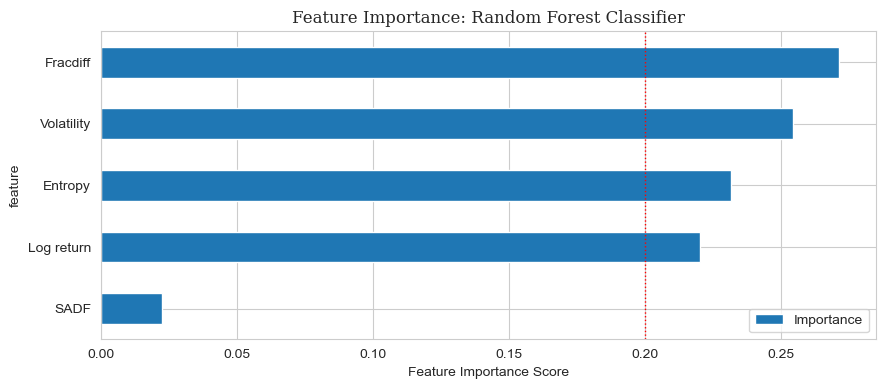

In [173]:
title = 'Feature Importance: Random Forest Classifier'
figsize = (10, 4)

feat_imp = pd.DataFrame({'Importance':rf.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending = False, inplace = True)
feat_imp = feat_imp

feat_imp.sort_values(by = 'Importance', inplace = True)
feat_imp = feat_imp.set_index('feature', drop = True)
feat_imp.plot.barh(figsize = figsize)
plt.axvline(1. / feat_imp.shape[0], linewidth = 1, color='r', linestyle='dotted')
plt.xlabel('Feature Importance Score')
plt.title(title, fontsize = 12, fontfamily = 'Serif')
plt.show()

In [125]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(matrix['Volatility'], matrix['Entropy'])
print('Correlation : %.4f' % matrix['Volatility'].corr(matrix['Entropy']))
print('Cointegration test p-value : %.4f' % p_value)
print('Cointegration test score : %.4f'  % score)

Correlation : 0.1451
Cointegration test p-value : 0.0000
Cointegration test score : -6.8240


In [126]:
from OptimalClustering import clusterKMeansBase

corr0, clstrs, silh = clusterKMeansBase(X.corr(), maxNumClusters = 10, n_init = 10)

maxNumClusters3


In [127]:
from featureImportance import featImpMDI_Clustered, featImpMDA, featImpMDI

imp = featImpMDA(fit, X_train, y_train)

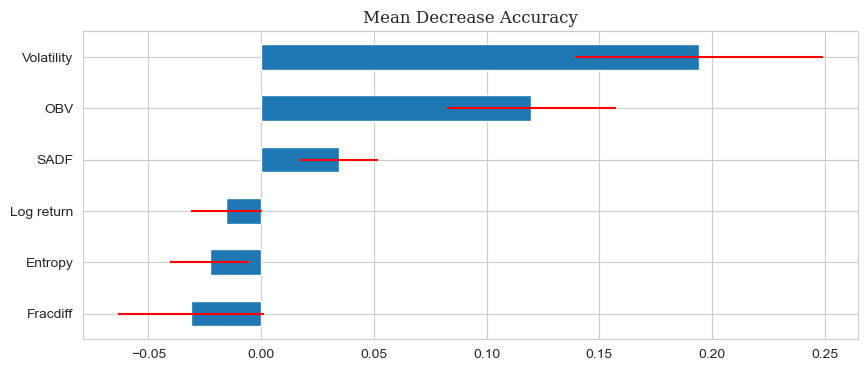

In [128]:
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 4))
imp['mean'].plot(kind='barh', xerr = imp['std'], error_kw = {'ecolor': 'r'})
plt.title('Mean Decrease Accuracy', fontsize = 12, fontfamily = 'Serif')
plt.show()

In [129]:
imp = featImpMDI(fit, featNames = X.columns)

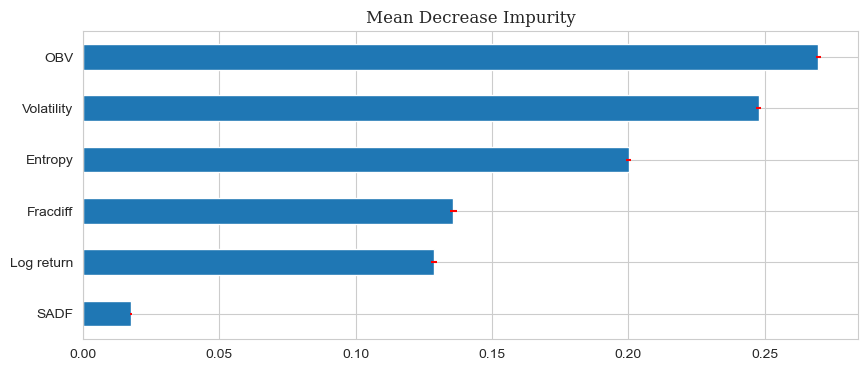

In [130]:
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 4))
imp['mean'].plot(kind='barh', xerr = imp['std'], error_kw = {'ecolor': 'r'})
plt.title('Mean Decrease Impurity', fontsize = 12, fontfamily = 'Serif')
plt.show()

Backtest

In [182]:
backtest = pd.DataFrame()
backtest['Predict'] = fit.predict(X_test)
backtest['Actual'] = y_test.values
backtest['Betting Size'] = fit.predict_proba(X_test)[:,1]
backtest['Return'] = X_test['Log return'].values
backtest['Backtest'] = fit.predict_proba(X_test)[:,1] * X_test['Log return'].values
backtest.index = X_test.index
backtest

,Predict,Actual,Betting Size,Return,Backtest
2021-03-25,0,0,0.318,0.004155,0.001321
2021-03-26,0,0,0.445,0.005128,0.002282
2021-03-29,0,0,0.437,0.001484,0.000648
2021-03-30,0,0,0.045,-0.012350,-0.000556
2021-03-31,0,0,0.216,0.018592,0.004016
...,...,...,...,...,...
2023-08-25,1,0,0.982,0.012564,0.012338
2023-08-28,1,0,0.994,0.008807,0.008754
2023-08-29,1,0,0.993,0.021576,0.021425
2023-08-30,1,0,0.978,0.018991,0.018573


Text(0.5, 1.0, 'Becktesting Machine Learning Model(Apple)')

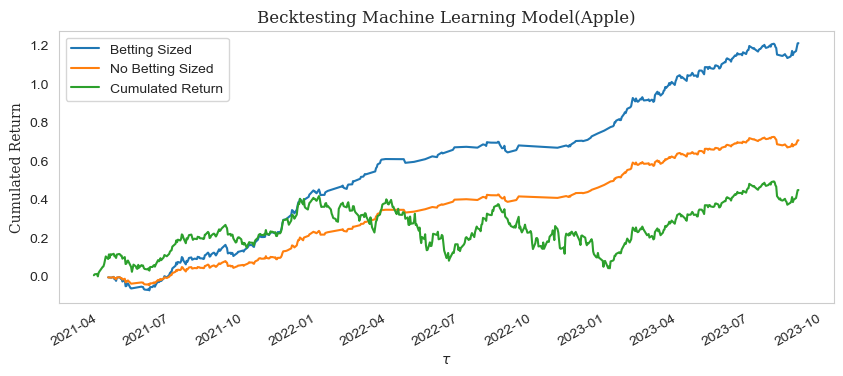

In [192]:
plt.figure(figsize = (10,4))
backtest[backtest['Predict'] == 1]['Backtest'].cumsum().plot(label = 'Betting Sized')
(backtest[backtest['Predict'] == 1]['Return'].cumsum()/2).plot(label = 'No Betting Sized')
backtest['Return'].cumsum().plot(label = 'Cumulated Return')
plt.legend()
plt.grid(False)
plt.xlabel(r'$\tau$')
plt.ylabel(r'Cumulated Return', fontfamily = 'Serif')
plt.title('Becktesting Machine Learning Model(Apple)', fontsize = 12, fontfamily = 'Serif')